In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import collections
import numpy as np

In [2]:
def get_running_rewards(mean_rewards):
    running_rewards = []
    for i, r in enumerate(mean_rewards):
        if i == 0:
            rr = r
        else:
            rr = rr * 0.99 + r * 0.01
        running_rewards.append(rr)
    return running_rewards

In [3]:
def get_option_termination_states(options, states, n_options=4):
    termination_states = {x: [] for x in range(n_options)}
    for episode in range(len(options)):
        option_trajectory = options[episode]
        for i in range(len(option_trajectory)-1):
            if option_trajectory[i] != option_trajectory[i+1]:
                term_state = states[episode][i]
                if term_state not in termination_states[option_trajectory[i]]:
                    termination_states[option_trajectory[i]].append(term_state)
    return termination_states

In [4]:
def load_data(folder, board_prop=False):
#     if kind == 'text':
#         f = eval(open(file, 'r').read())
#     if kind == 'pickle':
    f = pd.read_pickle(folder+'data.p')
    df = pd.DataFrame(f)
    df['total_reward'] = [np.sum(x) for x in df.reward]
    df['running_rewards'] = get_running_rewards(df.total_reward)
    if board_prop:
        board_properties = pd.read_pickle(folder+'board_properties.p')
        return df, board_properties
    else:
        return df

In [5]:
def coords_to_onehot(coords, boundaries):
    dim = np.prod(boundaries)
    w, h = boundaries
    x = np.zeros(dim)
    idx = coords[0] * w + coords[1]  # this should be w !!!!!!
    x[idx] = 1
    return x

In [6]:
def vec_to_features(state_vec, board_prop):
    idx1, idx2 = 0, 0
    def update_idx(add, idx1, idx2):
        idx1 = idx2
        idx2 += add
        return idx1, idx2
    idx1, idx2 = update_idx(board_prop['num_lights'], idx1, idx2)
    lights_on = state_vec[idx1: idx2]
    idx1, idx2 = update_idx(4, idx1, idx2)
    direction = state_vec[idx1:idx2]
    idx1, idx2 = update_idx(np.prod(board_prop['board_size']), idx1, idx2)
    coords = state_vec[idx1:idx2]
    idx1, idx2 = update_idx(board_prop['num_lights']+1, idx1, idx2)
    light_idx = state_vec[idx1:idx2]
    idx1, idx2 = update_idx(board_prop['max_height']+1, idx1, idx2)
    height = state_vec[idx1:idx2]
    features = {
        'lights_on': lights_on,
        'direction': direction, 
        'coords': coords,
        'light_idx': light_idx,
        'height': height
    }
    return features

In [7]:
def plot_trajectories(df, column, discrete=True, cmap='magma', n_actions=5, n_intervals=11, n_epochs_per_interval=100, figsize=10,  max_length=100):
    breaks = [int(x) for x in np.linspace(0, len(df), n_intervals)]
    prev_end = 0
    vmin = np.min(np.min(df[column]))
    vmax = np.max(np.max(df[column]))
    for i, bound in enumerate(breaks[1:]):
        data = df[column][prev_end:prev_end+n_epochs_per_interval]
        padded = []
        for d in data:
            to_append = d + [np.nan] * (max_length - len(d))
            padded.append(d + [np.nan] * (max_length - len(d)))
        if discrete:
            cmap = cmap_discretize(cmap, n_actions)
        fig = plt.figure(figsize=(figsize,figsize/2))
        plot = plt.imshow(padded, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.colorbar()  
        fig.suptitle('epoch {}:{}'.format(prev_end, prev_end+n_epochs_per_interval), fontsize=20)   
        prev_end = bound
        
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    cmap: colormap instance, eg. cm.jet. 
         N: number of colors.     
     Example
     x = resize(arange(100), (5,100))
     djet = cmap_discretize(cm.jet, 5)
     imshow(x, cmap=djet)
     """
    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in np.arange(N+1)]
        # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [8]:
def get_option_termination_states(options, states, n_options=4):
    termination_states = {x: [] for x in range(n_options)}
    for episode in range(len(options)):
        option_trajectory = options[episode]
        for i in range(len(option_trajectory)-1):
            if option_trajectory[i] != option_trajectory[i+1]:
                term_state = states_list[episode][i]
                if term_state not in termination_states[option_trajectory[i]]:
                    termination_states[option_trajectory[i]].append(term_state)
    return termination_states

In [9]:
def flatten(x): 
    if isinstance(x, collections.Iterable): 
        return [a for i in x for a in flatten(i)] 
    else: 
        return [x] 

In [10]:
def plot_trajectories(df, column, discrete=True, cmap='magma', n_actions=5, n_intervals=11, n_epochs_per_interval=100, figsize=10,  max_length=100):
    breaks = [int(x) for x in np.linspace(0, len(df), n_intervals)]
    prev_end = 0
    vmin = np.min(np.min(df[column]))
    vmax = np.max(np.max(df[column]))
    for i, bound in enumerate(breaks[1:]):
        data = df[column][prev_end:prev_end+n_epochs_per_interval]
        padded = []
        for d in data:
            to_append = d + [np.nan] * (max_length - len(d))
            padded.append(d + [np.nan] * (max_length - len(d)))
        if discrete:
            cmap = cmap_discretize(cmap, n_actions)
        fig = plt.figure(figsize=(figsize,figsize/2))
        plot = plt.imshow(padded, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.colorbar()  
        fig.suptitle('epoch {}:{}'.format(prev_end, prev_end+n_epochs_per_interval), fontsize=20)   
        prev_end = bound
        
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    cmap: colormap instance, eg. cm.jet. 
         N: number of colors.     
     Example
     x = resize(arange(100), (5,100))
     djet = cmap_discretize(cm.jet, 5)
     imshow(x, cmap=djet)
     """
    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in np.arange(N+1)]
        # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

def get_running_rewards(mean_rewards):
    running_rewards = []
    for i, r in enumerate(mean_rewards):
        if i == 0:
            rr = r
        else:
            rr = rr * 0.99 + r * 0.01
        running_rewards.append(rr)
    return running_rewards

def get_option_termination_states(options, states, n_options=4):
    termination_states = {x: [] for x in range(n_options)}
    for episode in range(len(options)):
        option_trajectory = options[episode]
        for i in range(len(option_trajectory)-1):
            if option_trajectory[i] != option_trajectory[i+1]:
                term_state = states[episode][i]
#                 if term_state not in termination_states[option_trajectory[i]]:
                termination_states[option_trajectory[i]].append(term_state)
    return termination_states

def load_data(folder, board_prop=False):
#     if kind == 'text':
#         f = eval(open(file, 'r').read())
#     if kind == 'pickle':
    f = pd.read_pickle(folder+'run_data.p')
    df = pd.DataFrame(f)
    df['total_reward'] = [np.sum(flatten(x)) for x in df.reward]
    df['running_rewards'] = get_running_rewards(df.total_reward)
#     states_list = []
#     for s in states:
#         states_list.append([list(x) for x in s])
#     df['state'] = states_list
    if board_prop:
        board_properties = pd.read_pickle(folder+'board_properties.p')
        return df, board_properties
    else:
        return df

def coords_to_onehot(coords, boundaries):
    dim = np.prod(boundaries)
    w, h = boundaries
    x = np.zeros(dim)
    idx = coords[0] * w + coords[1]  # this should be w !!!!!!
    x[idx] = 1
    return x

def vec_to_features(state_vec, board_prop):
    idx1, idx2 = 0, 0
    def update_idx(add, idx1, idx2):
        idx1 = idx2
        idx2 += add
        return idx1, idx2
    idx1, idx2 = update_idx(board_prop['num_lights'], idx1, idx2)
    lights_on = state_vec[idx1: idx2]
    idx1, idx2 = update_idx(4, idx1, idx2)
    direction = state_vec[idx1:idx2]
    idx1, idx2 = update_idx(np.prod(board_prop['board_size']), idx1, idx2)
    coords = state_vec[idx1:idx2]
    idx1, idx2 = update_idx(board_prop['num_lights']+1, idx1, idx2)
    light_idx = state_vec[idx1:idx2]
    idx1, idx2 = update_idx(board_prop['max_height']+1, idx1, idx2)
    height = state_vec[idx1:idx2]
    features = {
        'lights_on': lights_on,
        'direction': direction, 
        'coords': coords,
        'light_idx': light_idx,
        'height': height
    }
    return features

def plot_trajectories(df, column, discrete=True, cmap='magma', n_actions=5, n_intervals=11, n_epochs_per_interval=100, figsize=10,  max_length=100):
    breaks = [int(x) for x in np.linspace(0, len(df), n_intervals)]
    prev_end = 0
    vmin = np.min(np.min(df[column]))
    vmax = np.max(np.max(df[column]))
    for i, bound in enumerate(breaks[1:]):
        data = df[column][prev_end:prev_end+n_epochs_per_interval]
        padded = []
        for d in data:
            to_append = d + [np.nan] * (max_length - len(d))
            padded.append(d + [np.nan] * (max_length - len(d)))
        if discrete:
            cmap = cmap_discretize(cmap, n_actions)
        fig = plt.figure(figsize=(figsize,figsize/2))
        plot = plt.imshow(padded, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.colorbar()  
        fig.suptitle('epoch {}:{}'.format(prev_end, prev_end+n_epochs_per_interval), fontsize=20)   
        prev_end = bound
        
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    cmap: colormap instance, eg. cm.jet. 
         N: number of colors.     
     Example
     x = resize(arange(100), (5,100))
     djet = cmap_discretize(cm.jet, 5)
     imshow(x, cmap=djet)
     """
    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in np.arange(N+1)]
        # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [11]:
def plot_options(min_ep=1000, max_ep=10000, interval=1000):
    idxs = np.arange(min_ep, max_ep, interval)
    for episode in idxs:
        plt.matshow(np.array([df.action[episode], df.option[episode]]), cmap='viridis_r', vmin=0, vmax=8)
        plt.colorbar()

In [12]:
df = load_data('experiments/sparse__lightbot_minigrid_fractal_cross_0-0_s8_mc300_me20000_no8_dc0.05/')





KeyboardInterrupt: 

In [13]:
states = df.state
states_list = []
for s in states:
    states_list.append([list(x) for x in s])
df['state'] = states_list

In [16]:
df.action

0       [3, 2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 4, 4, 2, 0, ...
1       [3, 2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 4, 4, 2, 0, ...
2       [4, 2, 4, 2, 4, 2, 0, 3, 2, 3, 0, 2, 0, 2, 0, ...
3       [2, 2, 4, 2, 2, 2, 0, 2, 0, 2, 0, 4, 4, 2, 0, ...
4       [2, 2, 2, 2, 4, 2, 4, 2, 0, 3, 2, 3, 0, 2, 0, ...
5       [3, 2, 2, 2, 0, 3, 2, 3, 0, 2, 0, 2, 0, 4, 4, ...
6       [4, 0, 3, 4, 4, 2, 2, 2, 0, 3, 2, 3, 2, 0, 2, ...
7       [2, 3, 2, 2, 0, 4, 4, 2, 0, 3, 2, 3, 2, 0, 2, ...
8       [2, 4, 2, 2, 0, 3, 2, 3, 0, 2, 0, 2, 0, 4, 4, ...
9       [3, 2, 2, 2, 0, 4, 4, 2, 0, 3, 2, 3, 0, 2, 0, ...
10      [1, 0, 2, 3, 1, 0, 2, 0, 2, 0, 4, 4, 2, 2, 0, ...
11      [2, 3, 2, 2, 0, 4, 4, 2, 0, 3, 2, 3, 2, 0, 2, ...
12      [3, 3, 2, 2, 2, 0, 4, 4, 2, 0, 3, 2, 3, 0, 2, ...
13      [2, 4, 2, 2, 2, 2, 0, 3, 2, 3, 0, 2, 0, 2, 0, ...
14      [4, 2, 2, 2, 2, 4, 2, 4, 2, 0, 3, 2, 3, 0, 2, ...
15      [2, 0, 4, 2, 4, 0, 2, 0, 2, 0, 4, 4, 2, 2, 0, ...
16      [4, 4, 2, 2, 2, 2, 0, 4, 4, 2, 0, 3, 2, 3, 0, ...
17      [2, 2,

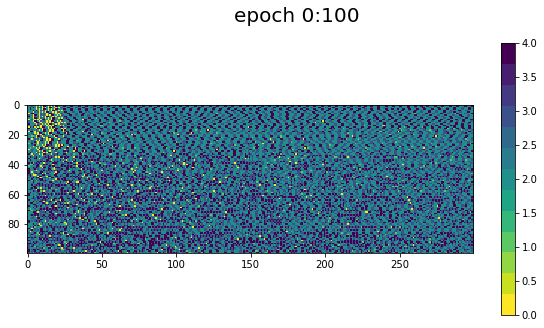

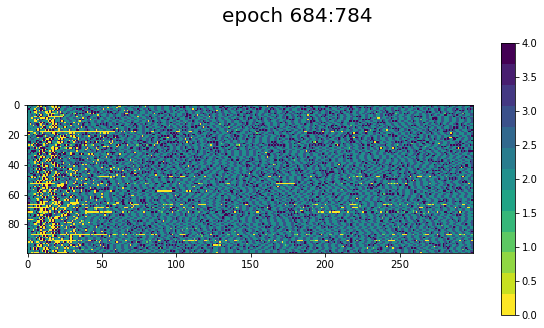

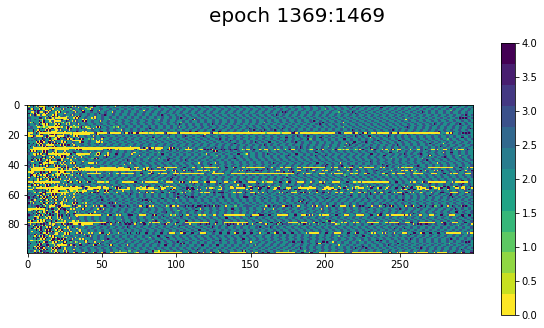

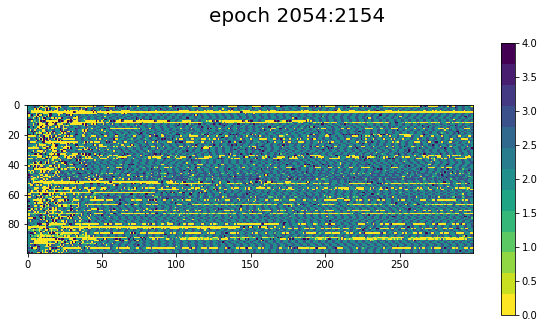

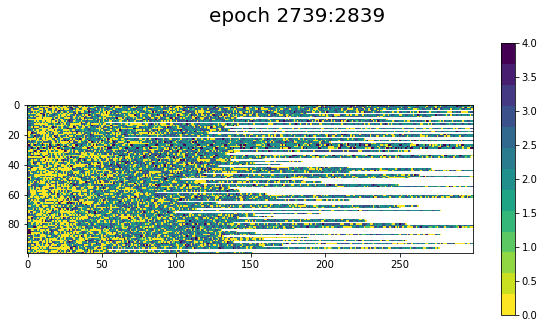

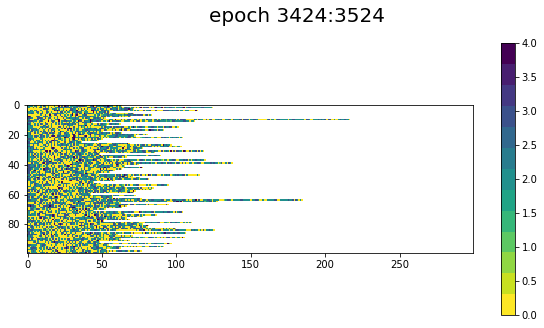

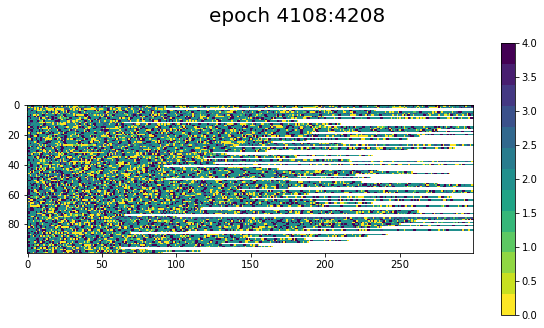

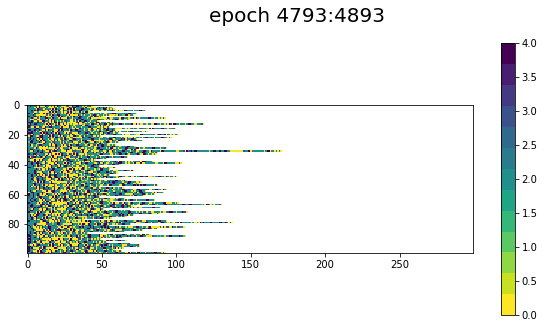

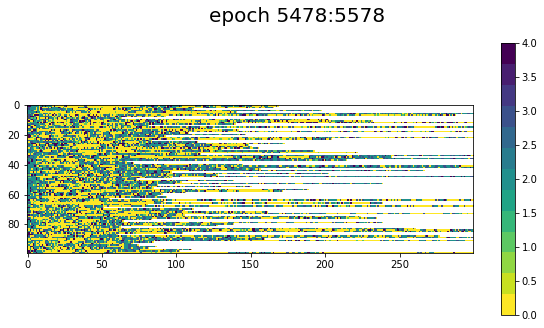

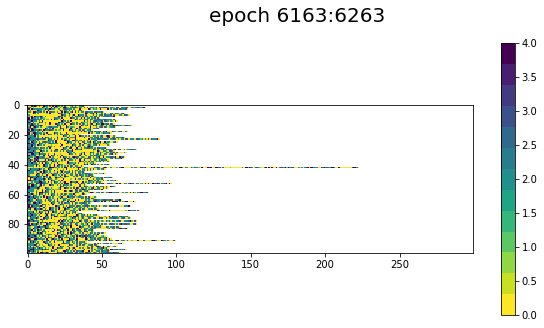

In [18]:
plot_trajectories(df, 'action', cmap='viridis_r', max_length=300, n_actions=13)

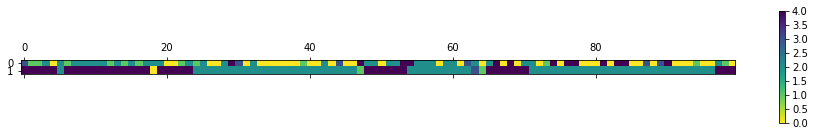

In [247]:
episode = 402
plt.matshow(np.array([df.action[episode], df.option[episode]]), cmap='viridis_r', vmin=0, vmax=4)
plt.colorbar()

In [23]:
plot_options(0, 0, 5000)

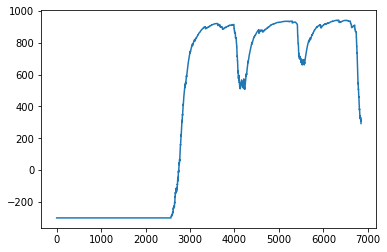

In [19]:
plt.plot(df.episode, df.running_rewards)

In [72]:
termination_states = get_option_termination_states(list(df.option), list(df.coords), n_options=8)




In [73]:
df.coords[20]

[array([4, 1]),
 array([4, 1]),
 array([4, 1]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([3, 2]),
 array([3, 2]),
 array([3, 2]),
 array([2, 2]),
 array([2, 2]),
 array([2, 2]),
 array([2, 2]),
 array([2, 2]),
 array([2, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([

In [74]:
grids = {x: np.zeros([7,7]) for x in termination_states.keys()}
for key in termination_states.keys():
    for idx in termination_states[key]:
        grids[key][idx[0], idx[1]] += 1

In [77]:
grid = np.zeros([7,7])
for ep in df.coords:
    for idx in ep:
        grid[idx[0], idx[1]] += 1

KeyboardInterrupt: 

In [79]:
df.coords[28]

[array([4, 1]),
 array([4, 1]),
 array([4, 1]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([4, 2]),
 array([3, 2]),
 array([3, 2]),
 array([3, 2]),
 array([2, 2]),
 array([2, 2]),
 array([2, 2]),
 array([2, 2]),
 array([2, 2]),
 array([2, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([1, 1]),
 array([

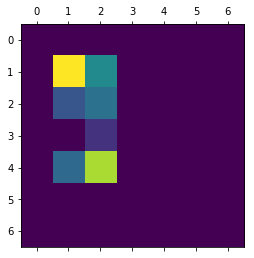

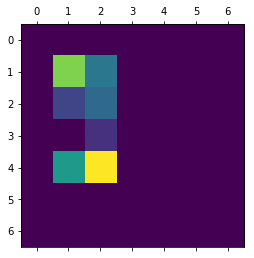

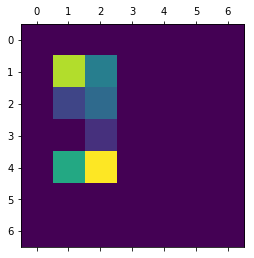

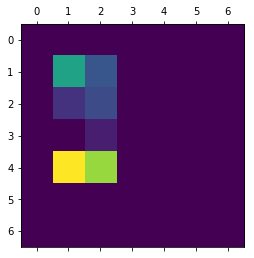

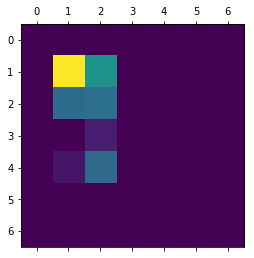

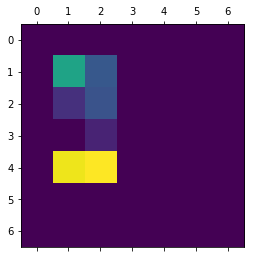

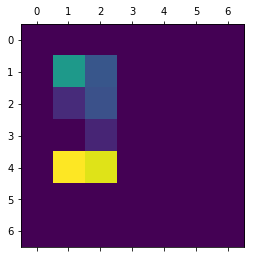

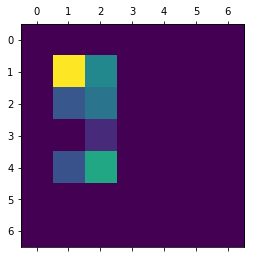

In [75]:
for x in range(8):
    plt.matshow(grids[x])

In [269]:
states = df.state
states_list = []
for s in states:
    states_list.append([list(x) for x in s])    

In [272]:
len(states_list[0])

200

In [275]:
df['state'] = states_list

In [37]:
termination_states_features = {}

In [529]:
df_ssc = load_data('../../ecr/experiments/learn_from_demo_random_init_hierarchical_lbot_puzzle_cross_hdim512_randominit_True_impossible_True_--epsilon_None_layers2_lr3e-05_me20000_mc100_update100_ppo_oe15_vi1_ms50_cl0.1_s0_r10,10,-1,-1_nha8_aps2_le40000/')

In [548]:
df_ssc = df

In [549]:

df_ssc.head()

,action,reward,episode,raw_state,next_raw_state,log_prob,value,mask,total_reward,running_rewards
0,"[1, 3, 0, 0, 1, 0, 1, 1, 0, 3, 1, 2, 2, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-1.3262599, -1.400366, -1.412364, -1.4120566,...","[0.023198642, 0.005251756, 0.031961508, 0.0254...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",-100.0,-100.0
1,"[1, 1, 2, 3, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-1.3262599, -1.3236251, -1.4296018, -1.399819...","[0.023198642, 0.005251756, 0.005251756, 0.0102...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",-100.0,-100.0
2,"[0, 0, 2, 2, 1, 1, 0, 2, 3, 3, 1, 3, 3, 0, 2, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-1.3999937, -1.4040713, -1.4209743, -1.419036...","[0.019798053, 0.023733009, 0.021926723, 0.0246...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",-100.0,-100.0
3,"[3, 2, 3, 1, 0, 1, 1, 3, 0, 2, 1, 0, 1, 1, 3, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-1.3982205, -1.4315906, -1.4067867, -1.310022...","[0.0028321072, 0.0028321072, 0.020870991, 0.00...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",-100.0,-100.0
4,"[1, 3, 2, 1, 3, 2, 1, 2, 1, 1, 1, 0, 2, 3, 0, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-1.3273541, -1.4028735, -1.4228573, -1.340533...","[0.022747185, 0.016254522, 0.020050032, 0.0162...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",-100.0,-100.0


In [517]:
actions = df_ssc.action
states = df_ssc.raw_state
ssc_participation_states = {}
grids = {x: np.zeros([5,5]) for x in range(5,13)}
for x in range(5,13):
    for i, trajectory in enumerate(actions):
        for j, a in enumerate(trajectory):
            if a > 4:
                grids[a][states[i][j]['coords'][0], states[i][j]['coords'][1]] += 1


In [531]:
actions = df_ssc.action
states = df_ssc.next_raw_state
ssc_termination_states = {}
ssc_termination_grids = {x: np.zeros([5,5]) for x in range(5,13)}
for x in range(5,13):
    for i, trajectory in enumerate(actions):
        for j, a in enumerate(trajectory):
            if a > 4:
                ssc_termination_grids[a][states[i][j]['coords'][0], states[i][j]['coords'][1]] += 1

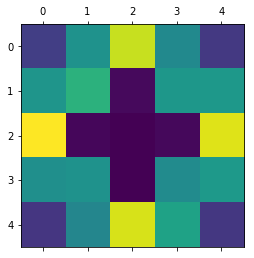

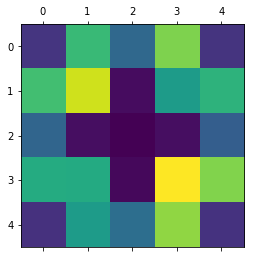

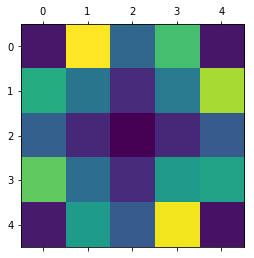

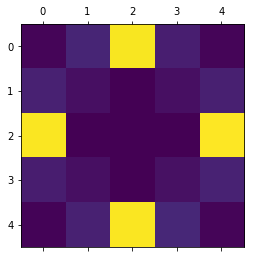

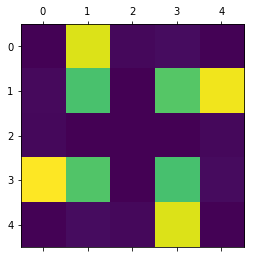

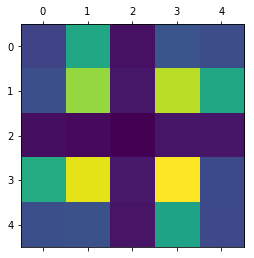

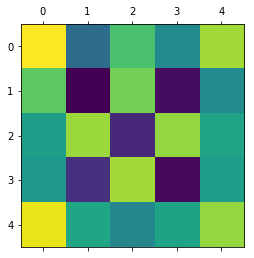

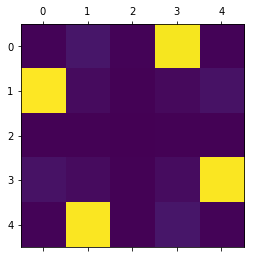

In [532]:
for x in range(5,13):
    plt.matshow(ssc_termination_grids[x])

In [439]:
termination_coords = {}
grids = {x: np.zeros(board_prop['board_size']) for x in termination_states.keys()}
for key in termination_states.keys():
    termination_states_features[key] = [vec_to_features(x, board_prop) for x in termination_states[key]]
    termination_coords[key] = [onehot_to_coords(x['coords'], board_prop['board_size']) for x in termination_states_features[key]]
    for idx in termination_coords[key]:
        grids[key][idx[0], idx[1]] += 1
        

In [39]:
df.head()

,episode,action,state,option,reward,total_reward,running_rewards
0,0,"[3, 2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 4, 4, 2, 0, ...","[[[[2 5 0], [2 5 0], [2 5 0], [2 5 0], [2 5 0]...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 10.0, -1....",-234.0,-234.0
1,1,"[3, 2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 4, 4, 2, 0, ...","[[[[2 5 0], [2 5 0], [2 5 0], [2 5 0], [2 5 0]...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 10.0, -1....",-234.0,-234.0
2,2,"[4, 2, 4, 2, 4, 2, 0, 3, 2, 3, 0, 2, 0, 2, 0, ...","[[[[2 5 0], [2 5 0], [2 5 0], [2 5 0], [2 5 0]...","[2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 10.0, -1....",-234.0,-234.0
3,3,"[2, 2, 4, 2, 2, 2, 0, 2, 0, 2, 0, 4, 4, 2, 0, ...","[[[[2 5 0], [2 5 0], [2 5 0], [2 5 0], [1 0 0]...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 10.0, -1....",-234.0,-234.0
4,4,"[2, 2, 2, 2, 4, 2, 4, 2, 0, 3, 2, 3, 0, 2, 0, ...","[[[[2 5 0], [1 0 0], [1 0 0], [1 0 0], [1 0 0]...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",-234.0,-234.0


In [38]:
options = df.option
states = df.state
oc_participation_states = {}
grids = {x: np.zeros([5,5]) for x in range(8)}
for x in range(8):
    for i, trajectory in enumerate(options):
        for j, a in enumerate(trajectory):
            features = vec_to_features(states[i][j], board_prop)
            idx = onehot_to_coords(features['coords'], board_prop['board_size'])
            grids[a][idx[0], idx[1]] += 1

NameError: name 'board_prop' is not defined

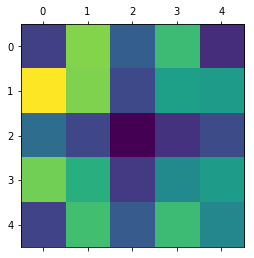

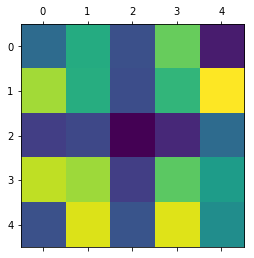

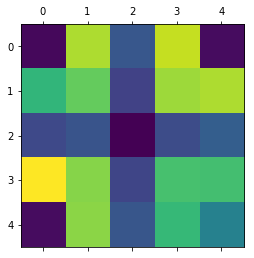

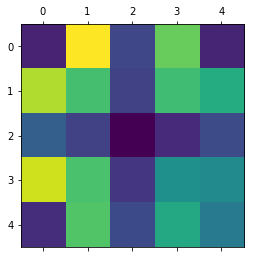

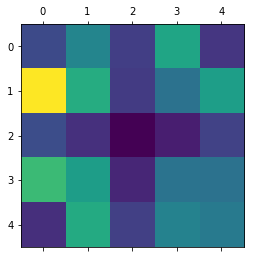

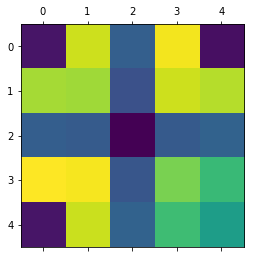

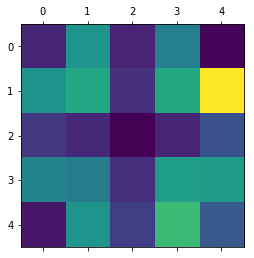

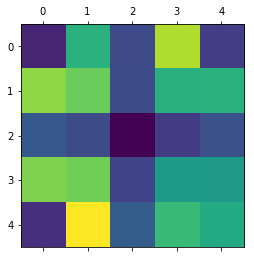

In [483]:
for x in range(8):
    plt.matshow(grids[x])

In [429]:
basic_grid = np.zeros([5,5])

In [432]:
coords = [(0,1), (1,0), (1,1), (3,0), (3,1), (4,1), (3,0), (3,1), (4,1), (3,3), (3,4), (4,3), (0,3), (1,3), (1,4)]
for c in coords:
    basic_grid[c[0], c[1]] = 1

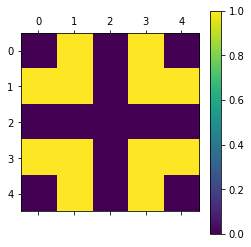

In [478]:
plt.matshow(basic_grid)
plt.colorbar()

In [395]:
board_prop

{'board_size': [5, 5], 'num_lights': 12, 'max_height': 2}

In [ ]:

def coords_to_onehot(coords, boundaries):
    dim = np.prod(boundaries)
    w, h = boundaries
    x = np.zeros(dim)
    idx = coords[0] * w + coords[1]  # this should be w !!!!!!
    x[idx] = 1
    return x


In [400]:
def onehot_to_coords(onehot, boundaries):
    w, h = boundaries
    idx = np.argmax(onehot)
    coords = np.unravel_index(idx, boundaries)
    return coords

In [401]:
c = onehot_to_coords(termination_coords[0][0], [5,5])

In [402]:
c

(1, 0)

In [404]:
termination_coords

{0: [(1, 0),
  (1, 0),
  (0, 3),
  (0, 1),
  (0, 1),
  (3, 0),
  (1, 1),
  (1, 1),
  (1, 2),
  (1, 4),
  (2, 4),
  (2, 4),
  (2, 4),
  (4, 0),
  (4, 0),
  (4, 0),
  (1, 0),
  (1, 0),
  (1, 0),
  (3, 0),
  (3, 2),
  (3, 0),
  (4, 0),
  (1, 0),
  (0, 0),
  (1, 2),
  (1, 2),
  (0, 1),
  (0, 1),
  (1, 2),
  (2, 0),
  (1, 0),
  (0, 0),
  (0, 2),
  (1, 0),
  (4, 0),
  (3, 0),
  (4, 1),
  (4, 1),
  (1, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (1, 0),
  (1, 1),
  (2, 1),
  (2, 1),
  (1, 1),
  (2, 4),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 1),
  (2, 1),
  (2, 1),
  (3, 3),
  (1, 0),
  (0, 0),
  (1, 0),
  (1, 0),
  (1, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 3),
  (0, 3),
  (0, 2),
  (0, 2),
  (2, 1),
  (2, 0),
  (1, 0),
  (3, 2),
  (3, 2),
  (3, 1),
  (4, 1),
  (4, 1),
  (4, 2),
  (1, 1),
  (1, 4),
  (2, 4),
  (2, 4),
  (4, 0),
  (4, 0),
  (1, 0),
  (4, 1),
  (1, 2),
  (0, 1),
  (0, 1),
  (1, 1),
  (1, 0),
  (2, 0),
  (1, 0),
  (2, 0),
  (1, 1),
  (0, 1),
  (0, 0),
  (2, 0),
  (1, 1),
  (1, 4

In [392]:
termination_states_features[0]

[{'lights_on': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'direction': array([1., 0., 0., 0.]),
  'coords': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
  'light_idx': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'height': array([0., 0., 1.])},
 {'lights_on': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'direction': array([0., 1., 0., 0.]),
  'coords': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
  'light_idx': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'height': array([0., 0., 1.])},
 {'lights_on': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'direction': array([0., 0., 1., 0.]),
  'coords': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
  'light_idx': array([0., 0., 0., 1., 0., 0., 0., 0., 

In [ ]:
termination_coords = [x['coords']]

In [159]:
env = LightbotEnv('cross')

board_properties = {'board_size': [int(x) for x in env.board_size], 
                    'num_lights': int(env.num_lights), 
                    'max_height': int(env.max_height)}

with open('experiments/lightbot_cross_s1_mc100_me20000_no8_dc0.1/' + '/board_properties.p', 'wb') as file:
    pickle.dump(board_properties, file)

In [341]:
layout = """\
wwwwwwwwwwwww
w     w     w
w     w     w
w           w
w     w     w
w     w     w
ww wwww     w
w     www www
w     w     w
w     w     w
w           w
w     w     w
wwwwwwwwwwwww
"""
occupancy = np.array([list(map(lambda c: 1 if c=='w' else 0, line)) for line in layout.splitlines()])


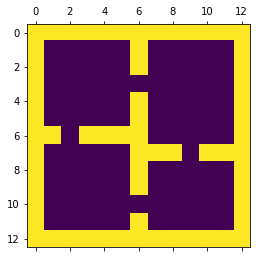

In [342]:
plt.matshow(occupancy)

In [343]:
tostate = {}
statenum = 0
for i in range(13):
    for j in range(13):
        if occupancy[i, j] == 0:
            tostate[(i,j)] = statenum
            statenum += 1
        tocell = {v:k for k,v in tostate.items()}

In [365]:
termination_states_coords = {}
counts = {}
grids = {x: occupancy.copy() for x in termination_states.keys()}
for a in termination_states.keys():
    counts[a] = {}
    termination_states_coords[a] = [np.argmax(x) for x in termination_states[a]]
    for x in termination_states_coords[a]:
        if tocell[x] not in counts[a].keys():
            counts[a][tocell[x]] = 1
        else:
            counts[a][tocell[x]] += 1
        grids[a][tocell[x][0], tocell[x][1]] += 1 
#     grids[a] = [x/len(termination_states_coords[a]) for x in grids[a] if x > 0 ]

In [360]:
len(termination_states_coords[0])

1348

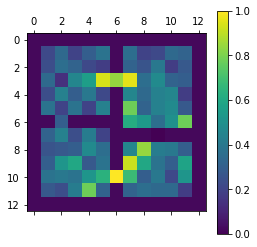

In [376]:
plt.matshow(grids[3]/np.max(grids[3]), cmap='viridis')
plt.colorbar()

In [367]:
np.sum(grids[0])

1413

In [310]:
counts[0]

{37: 9,
 1: 10,
 44: 9,
 34: 16,
 43: 6,
 33: 13,
 21: 13,
 58: 16,
 32: 6,
 23: 10,
 35: 14,
 90: 13,
 5: 8,
 28: 8,
 29: 19,
 9: 6,
 7: 10,
 15: 26,
 47: 23,
 50: 19,
 8: 5,
 49: 23,
 84: 16,
 87: 12,
 83: 10,
 73: 18,
 59: 11,
 97: 20,
 88: 16,
 68: 21,
 91: 14,
 76: 13,
 66: 11,
 20: 12,
 12: 6,
 3: 10,
 17: 14,
 6: 9,
 41: 9,
 51: 14,
 57: 7,
 98: 20,
 85: 16,
 61: 15,
 96: 17,
 94: 13,
 74: 7,
 95: 9,
 64: 15,
 69: 34,
 99: 8,
 93: 13,
 102: 15,
 71: 24,
 78: 23,
 100: 12,
 63: 13,
 36: 16,
 75: 9,
 67: 5,
 27: 11,
 13: 21,
 22: 9,
 65: 13,
 11: 10,
 42: 12,
 92: 9,
 72: 13,
 60: 8,
 2: 8,
 4: 11,
 24: 7,
 45: 9,
 10: 7,
 80: 11,
 103: 10,
 31: 5,
 86: 8,
 0: 5,
 16: 13,
 38: 15,
 40: 13,
 56: 19,
 55: 23,
 19: 15,
 30: 16,
 48: 22,
 26: 10,
 52: 16,
 25: 18,
 39: 10,
 53: 21,
 14: 20,
 18: 16,
 79: 11,
 70: 14,
 82: 14,
 77: 11,
 81: 18,
 54: 13,
 101: 11,
 89: 9,
 46: 5}

In [304]:
termination_states_coords[0]

[(4, 8),
 (1, 2),
 (5, 4),
 (4, 4),
 (5, 3),
 (4, 4),
 (4, 3),
 (3, 2),
 (5, 3),
 (7, 2),
 (4, 2),
 (3, 4),
 (4, 4),
 (5, 3),
 (5, 4),
 (3, 2),
 (4, 4),
 (5, 3),
 (4, 3),
 (4, 5),
 (10, 8),
 (1, 7),
 (3, 9),
 (3, 10),
 (1, 11),
 (1, 9),
 (2, 7),
 (5, 8),
 (5, 11),
 (1, 10),
 (5, 10),
 (10, 2),
 (10, 2),
 (10, 5),
 (10, 1),
 (9, 1),
 (7, 3),
 (11, 4),
 (10, 6),
 (8, 7),
 (10, 9),
 (9, 4),
 (8, 4),
 (3, 1),
 (2, 3),
 (4, 5),
 (3, 4),
 (1, 4),
 (2, 9),
 (1, 8),
 (5, 1),
 (5, 1),
 (7, 2),
 (6, 2),
 (9, 1),
 (7, 1),
 (11, 4),
 (10, 2),
 (11, 5),
 (10, 3),
 (7, 5),
 (9, 4),
 (11, 3),
 (10, 3),
 (9, 1),
 (11, 1),
 (9, 2),
 (11, 2),
 (8, 2),
 (7, 2),
 (6, 2),
 (11, 5),
 (9, 1),
 (7, 1),
 (7, 1),
 (9, 2),
 (8, 2),
 (7, 3),
 (10, 2),
 (11, 4),
 (8, 8),
 (8, 8),
 (11, 7),
 (10, 9),
 (10, 11),
 (11, 10),
 (8, 10),
 (9, 7),
 (10, 9),
 (9, 2),
 (11, 8),
 (10, 6),
 (9, 1),
 (8, 1),
 (6, 2),
 (1, 8),
 (1, 7),
 (1, 11),
 (2, 9),
 (2, 7),
 (5, 10),
 (4, 7),
 (5, 8),
 (7, 2),
 (8, 1),
 (7, 2),
 (3, 2),
 

(array([ 89., 153., 121., 126., 142., 149., 163., 135., 123., 148.]),
 array([  0. ,  10.3,  20.6,  30.9,  41.2,  51.5,  61.8,  72.1,  82.4,
         92.7, 103. ]),
 <a list of 10 Patch objects>)

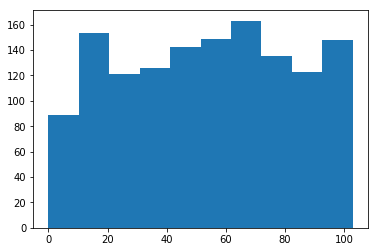

In [295]:
plt.hist(termination_states_coords[0])

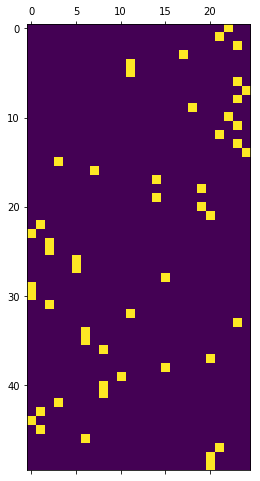

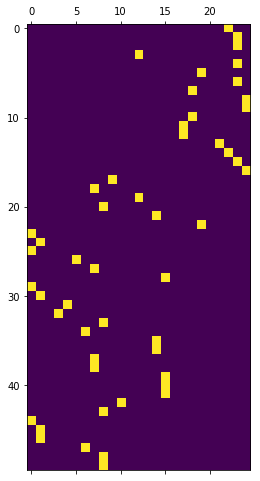

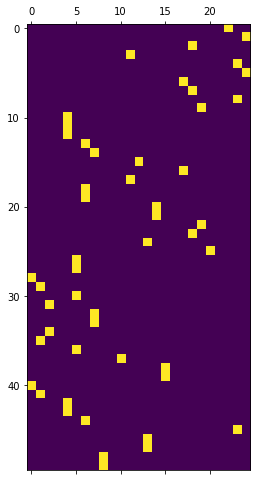

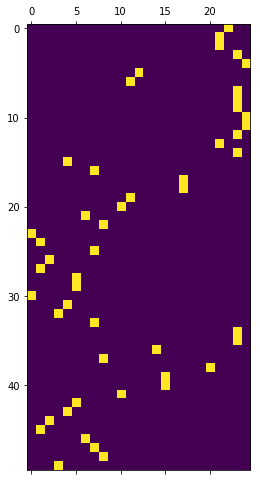

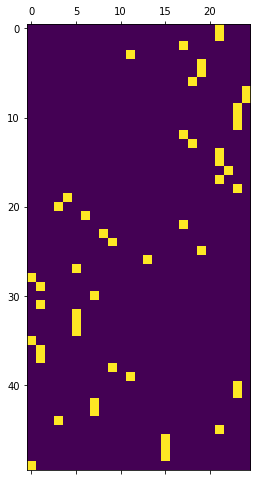

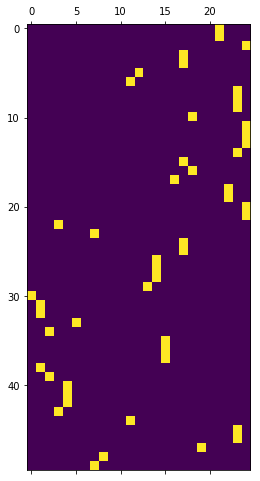

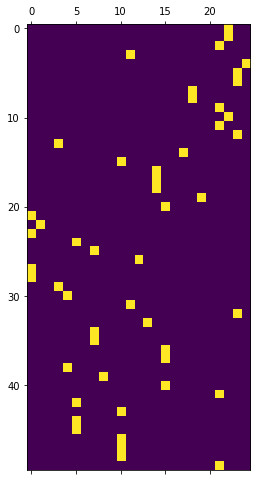

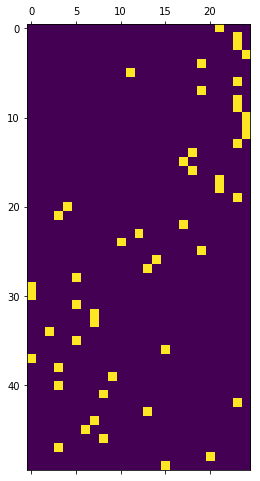

In [194]:
for i in range(8):
    plt.matshow([x['coords'] for x in termination_states_features[i]][:50])

In [180]:
option_0_coords = [x['coords'] for x in termination_states_features[0]]
option_1_coords = [x['coords'] for x in termination_states_features[1]]
option_2_coords = [x['coords'] for x in termination_states_features[2]]
option_3_coords = [x['coords'] for x in termination_states_features[3]]
option_4_coords = [x['coords'] for x in termination_states_features[4]]
option_5_coords = [x['coords'] for x in termination_states_features[5]]
option_6_coords = [x['coords'] for x in termination_states_features[6]]
option_7_coords = [x['coords'] for x in termination_states_features[7]]

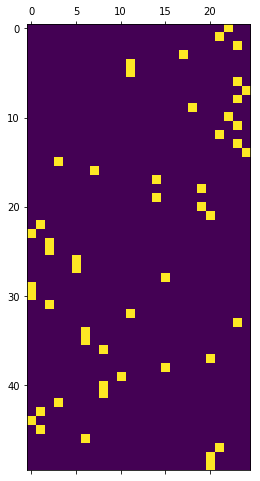

In [174]:
plt.matshow(np.array(option_0_coords)[:50])

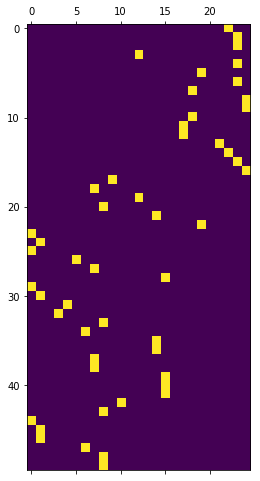

In [176]:
plt.matshow(np.array(option_1_coords)[:50])

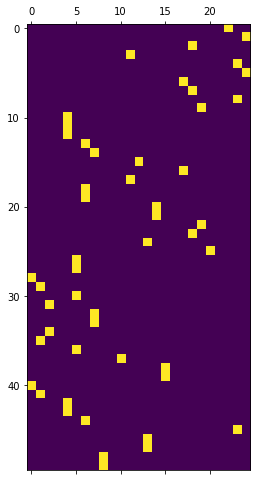

In [178]:
plt.matshow(np.array(option_2_coords)[:50])

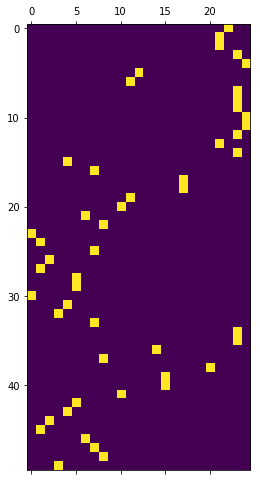

In [181]:
plt.matshow(np.array(option_3_coords)[:50])

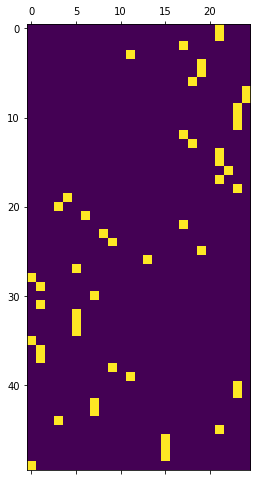

In [182]:

plt.matshow(np.array(option_4_coords)[:50])

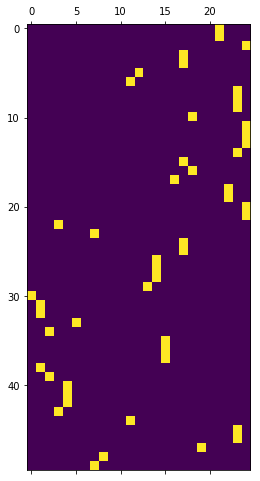

In [183]:
plt.matshow(np.array(option_5_coords)[:50])

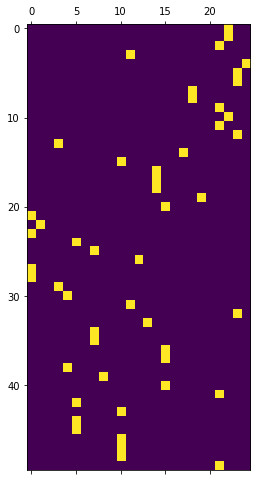

In [184]:
plt.matshow(np.array(option_6_coords)[:50])

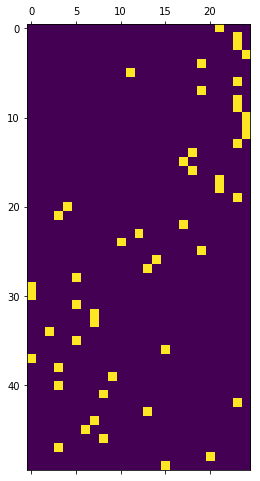

In [185]:
plt.matshow(np.array(option_7_coords)[:50])